# Data exploration

In [1]:
from typing import Tuple
import pandas as pd
import sys
sys.path.append("../") # go to parent dir

def load_datasets(storage_folder) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    return [pd.read_pickle(storage_folder / f'{phase}_beatmaps.pkl') for phase in
            ['train', 'val', 'test']]

In [102]:
from IPython.display import display, Markdown, Latex

def dataset_stats(df: pd.DataFrame):
    # 1/2 of snippets are overlapping
    group_over = ['name', 'difficulty', 'snippet', 'time', ]
    for end_index in range(1, len(group_over) + 1):
        print(f"{df.groupby(group_over[:end_index]).ngroups:9} unique {' × '.join(group_over[:end_index])}")
    
    print(f"{df.groupby(['name']).apply(lambda x: x.index.to_frame()['time'].max()).sum() / 3600:9.2f} "
          'hours of unique audio')
    print(f"{df.groupby(['name', 'difficulty']).apply(lambda x: x.index.to_frame()['time'].max()).sum() / 3600:9.2f} "
          'hours of unique gameplay')
    print(f"{len(df['word'].unique()):9} unique actions")

def whole_dataset_stats(train, val, test):
    display(Markdown('### Train'))
    dataset_stats(train)
    display(Markdown('### Validation'))
    dataset_stats(val)
    display(Markdown('### Test'))
    dataset_stats(test)
    display(Markdown('### Unique actions overlap'))
    print(f'{len(set(val.word.unique()) - set(train.word.unique())):9} unique actions in validation compared to train')
    print(f'{len(set(test.word.unique()) - set(train.word.unique()) - set(val.word.unique())):9} unique actions in test compared to train and validation')

In [105]:
from pathlib import Path

display(Markdown('## Our dataset'))
storage_folder = Path('../../data/old_datasets')
whole_dataset_stats(*load_datasets(storage_folder))

display(Markdown('## OxAI dataset'))
storage_folder = Path('../../data/new_datasets')
whole_dataset_stats(*load_datasets(storage_folder))

## Our dataset

### Train

      705 unique name
     1615 unique name × difficulty
    33883 unique name × difficulty × snippet
  1694150 unique name × difficulty × snippet × time
    38.07 hours of unique audio
    86.68 hours of unique gameplay
     2449 unique actions


### Validation

       86 unique name
      182 unique name × difficulty
     3779 unique name × difficulty × snippet
   188950 unique name × difficulty × snippet × time
     4.49 hours of unique audio
     9.22 hours of unique gameplay
      924 unique actions


### Test

       78 unique name
      179 unique name × difficulty
     4039 unique name × difficulty × snippet
   201950 unique name × difficulty × snippet × time
     4.23 hours of unique audio
     9.36 hours of unique gameplay
      946 unique actions


### Unique actions overlap

       96 unique actions in validation compared to train
       99 unique actions in test compared to train and validation


## OxAI dataset

### Train

      613 unique name
     1499 unique name × difficulty
    36141 unique name × difficulty × snippet
  1807050 unique name × difficulty × snippet × time
    32.48 hours of unique audio
    77.61 hours of unique gameplay
     2489 unique actions


### Validation

       80 unique name
      197 unique name × difficulty
     4927 unique name × difficulty × snippet
   246350 unique name × difficulty × snippet × time
     4.28 hours of unique audio
    10.40 hours of unique gameplay
     1060 unique actions


### Test

       72 unique name
      152 unique name × difficulty
     3916 unique name × difficulty × snippet
   195800 unique name × difficulty × snippet × time
     3.93 hours of unique audio
     8.19 hours of unique gameplay
      981 unique actions


### Unique actions overlap

      105 unique actions in validation compared to train
       79 unique actions in test compared to train and validation


## Number of beat elements per action

In [204]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 21})

def plot_action_distro(df: pd.DataFrame):
    ax = (train.word.str.len() // 5 + 1).value_counts().sort_index().plot.bar(logy=True, figsize=(16, 8))
    ax.set_title('Number of beat elements per action')

    by_difficulty = train.groupby('difficulty').apply(lambda df: (df.word.str.len() // 5 + 1).value_counts().sort_index().to_frame().T)

    by_difficulty.index = by_difficulty.index.droplevel(1)

    ax = by_difficulty.reindex(['Easy', 'Normal', 'Hard', 'Expert', 'ExpertPlus',], fill_value=0.0).plot.bar(logy=True, figsize=(16, 8))
    ax.set_title('Number of beat elements per action per distribution')
    ax.set_ylabel('# of actions')

## Our dataset

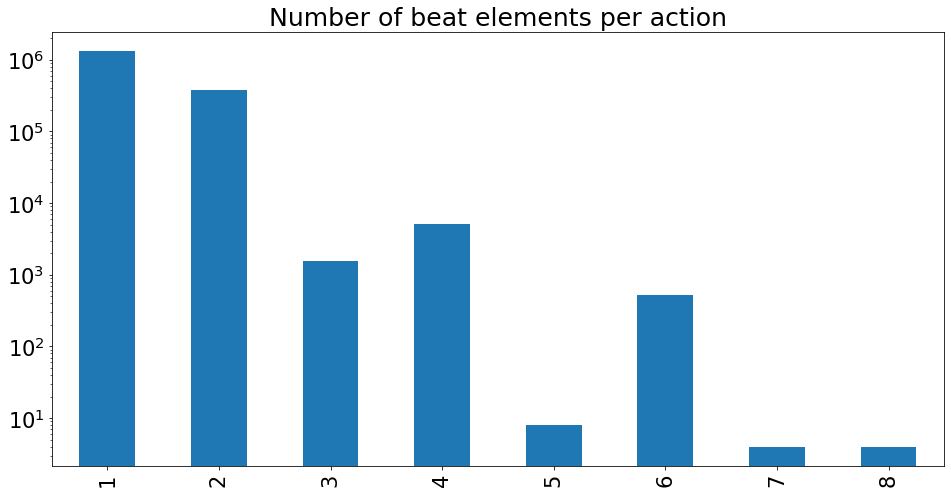

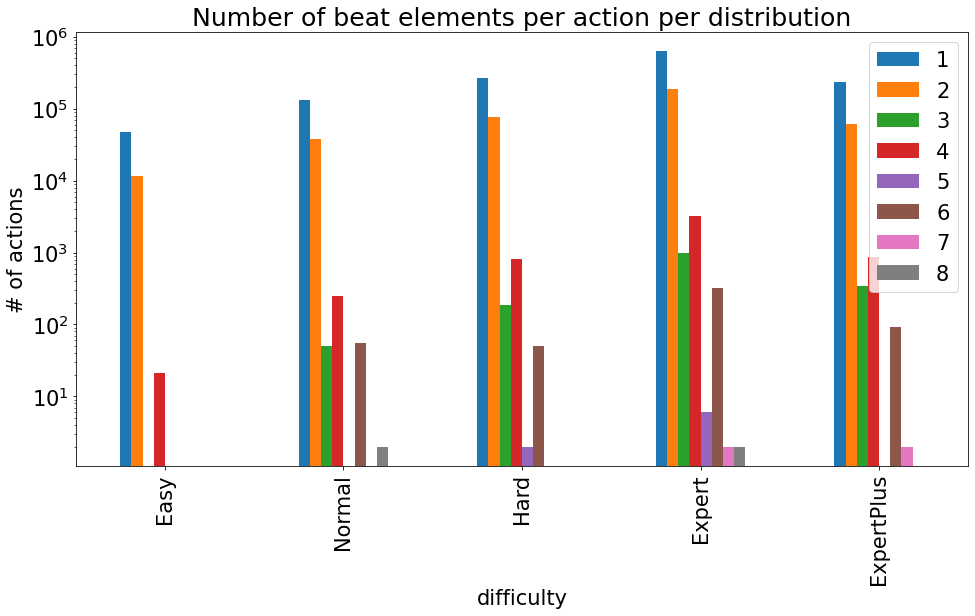

In [205]:
display(Markdown('## Our dataset'))
storage_folder = Path('../../data/old_datasets')
train, val, test = load_datasets(storage_folder)
plot_action_distro(train)

## OxAI dataset

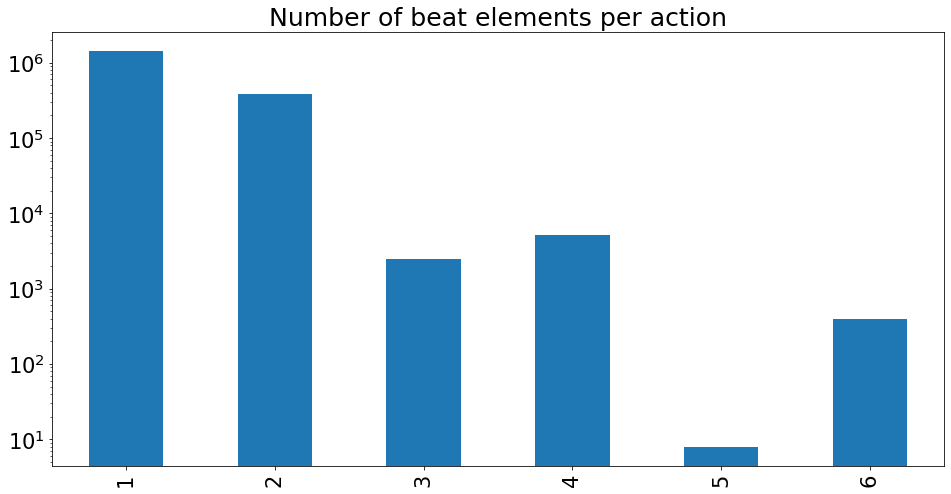

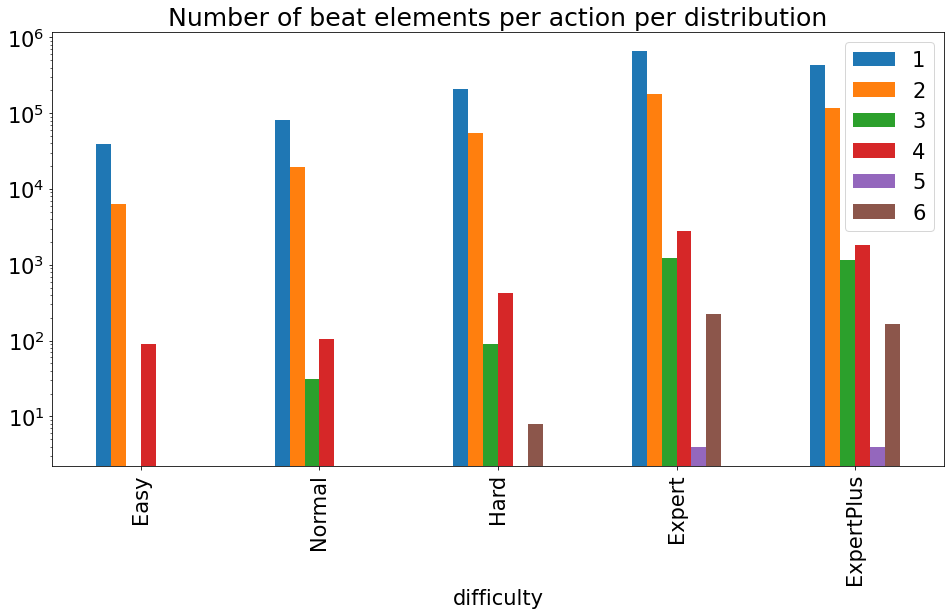

In [200]:
display(Markdown('## OxAI dataset'))
storage_folder = Path('../../data/new_datasets')
train, val, test = load_datasets(storage_folder)
plot_action_distro(train)

## Song length

In [217]:
def create_sentence(x):
    x.name = 'word'
    x = x.reset_index('time')
    x = x.drop_duplicates('time')
    return x.word.to_list()

def plot_sentence_lengths(df):
    lengths = df.droplevel(2).word.groupby(['name', 'difficulty']).apply(create_sentence).str.len()
    ax = lengths.plot.hist(figsize=(16, 8))
    ax.set_xlabel('Sentence length [# words]')
    display(lengths.describe().to_frame())

## Our dataset

,word
count,1615.000000
mean,512.653251
std,250.657588
min,57.000000
25%,329.500000
50%,469.000000
75%,645.000000
max,1701.000000


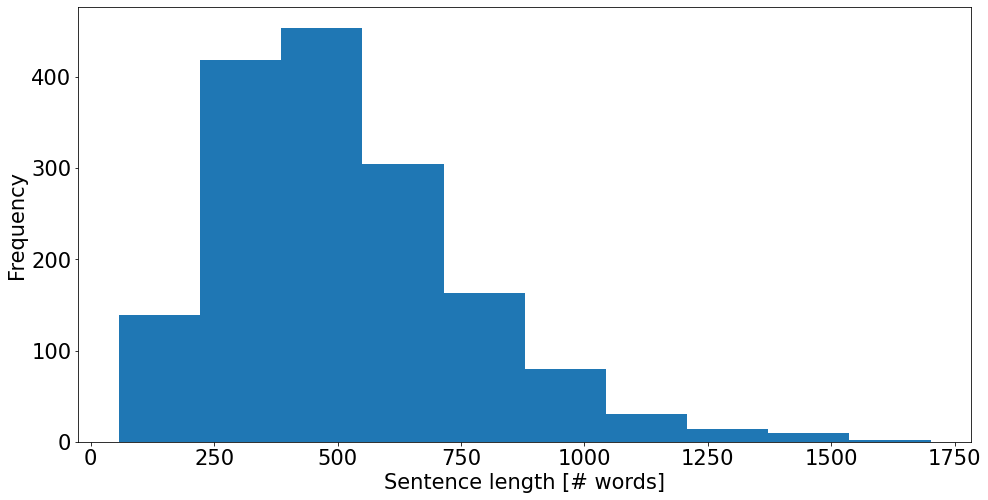

In [218]:
display(Markdown('## Our dataset'))
storage_folder = Path('../../data/old_datasets')
train, val, test = load_datasets(storage_folder)
plot_sentence_lengths(train)

## OxAI dataset

,word
count,1499.000000
mean,590.402268
std,315.588323
min,52.000000
25%,360.000000
50%,548.000000
75%,758.000000
max,3013.000000


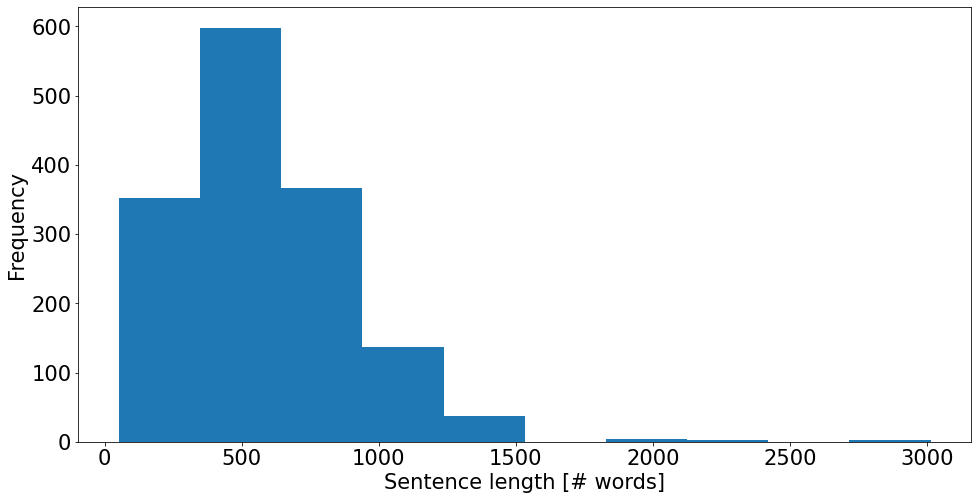

In [219]:
display(Markdown('## OxAI dataset'))
storage_folder = Path('../../data/new_datasets')
train, val, test = load_datasets(storage_folder)
plot_sentence_lengths(train)

## LaTeX DataFrame output

In [183]:
storage_folder = Path('../../data/old_datasets')
train, val, test = load_datasets(storage_folder)
val.index.to_frame().name.unique()[:100]

array(['AMENOHOAKARI', 'Adventure of a Lifetime',
       'All Time Low (BOXINLION Remix)', 'Alone Slushii Remix', 'Always',
       'Armed And Ready', 'BABYMETAL-Starlight', 'BRAVE JEWEL (TV size)',
       'Bangarang', 'Beat it', 'Becoming', 'Black Rover (TV Size)',
       'Bonfire', 'Bottle of Jack - Mikey Wax',
       'Boulevard of Broken Dreams', 'Bring it Back - Tisoki',
       'Careless Whisper', 'Closer', 'Conqueror', 'Courage',
       'Crack Traxxxx', 'Crawling', 'Crossing Field',
       'Darkside - Alan Walker', 'EC1-Rio', 'Fire Hive (Rickput)',
       'Flat Zone 2', 'Good Morning USA', 'Goodbye to A World',
       'Heaven Rd 2', "Hideki Naganuma - AIN'T NOTHIN' LIKE A FUNKY BEAT",
       'High Hopes', 'Hitorigoto - ClariS', 'Hype feat. Such',
       'Hyper Drive', 'Hysteria', 'I Knew You Were In Trouble',
       'I Took A Pill In Ibiza (SeeB Remix)', 'I nyaned for Hours',
       'Ignite (SAO)', 'John Powell - Test Drive', 'Jump Up, Super Star!',
       'LAST GAME (TV-Size)', 'L

In [116]:
storage_folder = Path('../../data/new_datasets')
train, val, test = load_datasets(storage_folder)
print(val.head().to_latex())
print(val.columns)
val.iloc[500:600].head()

\begin{tabular}{llllrrrrrrlrrrllrrrrrrrlr}
\toprule
     &        &   &       &  l\_lineLayer &  l\_lineIndex &  l\_cutDirection &  r\_lineLayer &  r\_lineIndex &  r\_cutDirection &       word &   prev &   next &      part &                                               mfcc &                                           word\_vec &  word\_id &  prev\_l\_lineLayer &  prev\_l\_lineIndex &  prev\_l\_cutDirection &  prev\_r\_lineLayer &  prev\_r\_lineIndex &  prev\_r\_cutDirection &                                      prev\_word\_vec &  prev\_word\_id \\
name & difficulty & snippet & time &              &              &                 &              &              &                 &            &        &        &           &                                                    &                                                    &          &                   &                   &                      &                   &                   &                      &                          

l_lineLayer  l_lineIndex  l_cutDirection  \
name difficulty snippet time                                               
30ef Expert     250     90.918            0            2               1   
                        91.249            1            0               2   
                        91.420            0            1               1   
                        91.579            0            3               7   
                        91.751            0            0               6   

                                r_lineLayer  r_lineIndex  r_cutDirection  \
name difficulty snippet time                                               
30ef Expert     250     90.918            0            3               1   
                        91.249            1            0               2   
                        91.420            0            2               1   
                        91.579            0            3               7   
                        91.751            0            0               6   

                                     word   prev   next      part  ...  \
name difficulty snippet time                                       ...   
30ef Expert     250     90.918  L021_R031  0.330  0.331  0.275581  ...   
                        91.249       L102  0.331  0.171  0.276584  ...   
                        91.420  L011_R021  0.171  0.159  0.277103  ...   
                        91.579       R037  0.159  0.172  0.277584  ...   
                        91.751       L006  0.172  0.158  0.278106  ...   

                                                                         word_vec  \
name difficulty snippet time                                                        
30ef Expert     250     90.918  [-0.2642, -0.1865, -0.2078, -0.2866, 0.09827, ...   
                        91.249  [0.2184, 0.0528, 0.561, -0.0498, -0.0955, 0.40...   
                        91.420  [-0.02002, 0.11383, 0.1425, -0.02528, 0.178, -...   
                        91.579  [-0.3286, -0.305, 0.003819, -0.01487, 0.3926, ...   
                        91.751  [-0.3596, -0.1683, -0.335, -0.2322, 0.07153, 0...   

                               word_id  prev_l_lineLayer  prev_l_lineIndex  \
name difficulty snippet time                                                 
30ef Expert     250     90.918      88                 1                 3   
                        91.249       4                 0                 2   
                        91.420      25                 1                 0   
                        91.579      63                 0                 1   
                        91.751      79                 0                 3   

                                prev_l_cutDirection  prev_r_lineLayer  \
name difficulty snippet time                                            
30ef Expert     250     90.918                    3                 1   
                        91.249                    1                 0   
                        91.420                    2                 1   
                        91.579                    1                 0   
                        91.751                    7                 0   

                                prev_r_lineIndex  prev_r_cutDirection  \
name difficulty snippet time                                            
30ef Expert     250     90.918                 3                    3   
                        91.249                 3                    1   
                        91.420                 0                    2   
                        91.579                 2                    1   
                        91.751                 3                    7   

                                                                    prev_word_vec  \
name difficulty snippet time                                                        
30ef Expert     250     90.918  [0.5366, -0.287, 0.8335, -0.02771, 0.5464, 0.1...   
                        9

## Data changes exploration

In [118]:
storage_folder = Path('../../data/new_datasets_config_test') # 26 + 26
train, val, test = load_datasets(storage_folder)

In [130]:
val.index.to_frame().difficulty.unique()

array(['Expert', 'Hard', 'Normal', 'ExpertPlus', 'Easy'], dtype=object)

In [143]:
len(set(train.word.unique()) - set(train.xs('ExpertPlus', level='difficulty').word.unique()))

297

In [151]:
len(set(train.xs('ExpertPlus', level='difficulty').word.unique()) & set(train.word.unique()))

2192

In [150]:
len(train.word.unique())- 297 - 2192

2489

In [89]:
class ArbitraryDataclass():
    def __init__(self, **kwargs):
        for key, val in kwargs.items():
            setattr(self, key, val)
            
class DataDict():
    def __init__(self):
        self.__dict = {}
        
    def __setitem__(self, key, val):
        self.__dict[key] = ArbitraryDataclass(**val)
        
    def __getitem__(self, key):
        return self.__dict[key]

models = ['m1', 'm2', ]
data = DataDict()

def data_prep(data, models):
    for m in models:
        a = m + '-a'
        b = m + '-b'
        data[m] = locals()

def visualize(data, models):
    for m in models:
        l = data[m]
        print(l.a, l.b, )

data_prep(data, models)
visualize(data, models)

data['m1'].train

m1-a m1-b
m2-a m2-b


AttributeError: 'ArbitraryDataclass' object has no attribute 'train'

In [84]:
q = 'asd'

In [56]:
d['m']

KeyError: 'm'